In [1]:
# وارد کردن کتابخانه‌های لازم
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Imports libraries used in this notebook: `numpy` and `pandas` for data manipulation, scikit-learn modules to load the Iris dataset and provide preprocessing (`StandardScaler`), modeling (`Perceptron`), dimensionality reduction (`PCA`), and evaluation metrics; `matplotlib` and `seaborn` for plotting. Warnings are suppressed to keep output cleaner.

In [2]:
# بارگذاری داده‌ها
iris = load_iris()
X = iris.data  # ویژگی‌ها (4 ویژگی)
y = iris.target  # برچسب‌ها (3 کلاس)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Classes: {np.unique(y)}")
print(f"Feature names: {iris.feature_names}")

# نمایش اطلاعات کلی
print("\n📌 اطلاعات داده‌ها:")
print(iris.DESCR[:500] + "...")

Shape of X: (150, 4)
Shape of y: (150,)
Classes: [0 1 2]
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

📌 اطلاعات داده‌ها:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= =====...


this cell is a human-readable explanation of the imports in Cell 1. It provides context about which libraries are used and why, and it does not execute any code.

In [3]:
# تقسیم داده‌ها به نسبت 80% آموزش و 20% تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120
Test set size: 30


Loads the Iris dataset into variables `X` (features) and `y` (labels), then prints dataset shapes, unique class labels, feature names, and a short dataset description for quick inspection.

In [4]:
# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ داده‌ها استاندارد شدند.")

✅ داده‌ها استاندارد شدند.


Standardizes features using `StandardScaler`: fits the scaler on the training set and transforms both the training and test sets so each feature has zero mean and unit variance. Feature scaling helps many ML algorithms converge and perform more reliably. The cell prints a confirmation message when done.

In [5]:
# لیستی از مدل‌ها و تنظیماتشون
models = []

# 1. Perceptron با max_iter مختلف
max_iters = [10, 50, 100, 500, 1000]
for max_iter in max_iters:
    models.append((f'Perceptron (max_iter={max_iter})', Perceptron(max_iter=max_iter, random_state=42)))

# 2. Perceptron با eta0 مختلف
etas = [1, 0.1, 0.01, 0.001]
for eta in etas:
    models.append((f'Perceptron (eta0={eta})', Perceptron(eta0=eta, random_state=42)))

# 3. Perceptron با PCA (کاهش بعد به 2 بعد)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

models.append(('Perceptron with PCA (2D)', Perceptron(random_state=42)))

This code builds a list of Perceptron classifier configurations with different hyperparameters (max_iter, eta0) and one version applied on PCA-reduced (2D) data, ready for comparison or evaluation.

In [6]:
# لیستی برای ذخیره نتایج
results = {
    'Model Name': [],
    'Accuracy': [],
    'Confusion Matrix': [],
    'Converged?': []
}

# آموزش و ارزیابی هر مدل
for name, model in models:
    print(f"\n--- Training: {name} ---")
    
    # انتخاب داده‌های مناسب برای هر مدل
    if "PCA" in name:
        X_train_use = X_train_pca
        X_test_use = X_test_pca
    else:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
    
    # آموزش مدل
    model.fit(X_train_use, y_train)
    
    # پیش‌بینی
    y_pred = model.predict(X_test_use)
    
    # محاسبه معیارها
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    converged = model.n_iter_ < model.max_iter  # بررسی همگرایی
    
    # ذخیره نتایج
    results['Model Name'].append(name)
    results['Accuracy'].append(acc)
    results['Confusion Matrix'].append(cm)
    results['Converged?'].append(converged)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Converged: {converged}")
    print(f"Iterations: {model.n_iter_}")


--- Training: Perceptron (max_iter=10) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (max_iter=50) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (max_iter=100) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (max_iter=500) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (max_iter=1000) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (eta0=1) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (eta0=0.1) ---
Accuracy: 0.8667
Converged: True
Iterations: 8

--- Training: Perceptron (eta0=0.01) ---
Accuracy: 0.9000
Converged: True
Iterations: 7

--- Training: Perceptron (eta0=0.001) ---
Accuracy: 0.6667
Converged: True
Iterations: 6

--- Training: Perceptron with PCA (2D) ---
Accuracy: 0.8667
Converged: True
Iterations: 17


This code trains and evaluates each Perceptron model in the models list, using either original scaled data or PCA-reduced data as appropriate. It records each model’s name, accuracy, confusion matrix, and whether it converged (i.e., finished before reaching max_iter) into a results dictionary, and prints key metrics during training.

In [7]:
# تبدیل نتایج به DataFrame
results_df = pd.DataFrame(results)
print("\n" + "="*120)
print("✅ نتایج کلی مدل‌ها:")
print("="*120)
print(results_df[['Model Name', 'Accuracy', 'Converged?']].round(4).sort_values(by='Accuracy', ascending=False))


✅ نتایج کلی مدل‌ها:
                   Model Name  Accuracy  Converged?
7      Perceptron (eta0=0.01)    0.9000        True
0    Perceptron (max_iter=10)    0.8667        True
1    Perceptron (max_iter=50)    0.8667        True
2   Perceptron (max_iter=100)    0.8667        True
4  Perceptron (max_iter=1000)    0.8667        True
3   Perceptron (max_iter=500)    0.8667        True
5         Perceptron (eta0=1)    0.8667        True
6       Perceptron (eta0=0.1)    0.8667        True
9    Perceptron with PCA (2D)    0.8667        True
8     Perceptron (eta0=0.001)    0.6667        True


This code converts the results dictionary into a pandas DataFrame, then prints a neatly formatted summary table showing each model's name, accuracy (rounded to 4 decimals), and convergence status—sorted by accuracy in descending order to highlight the best-performing models.

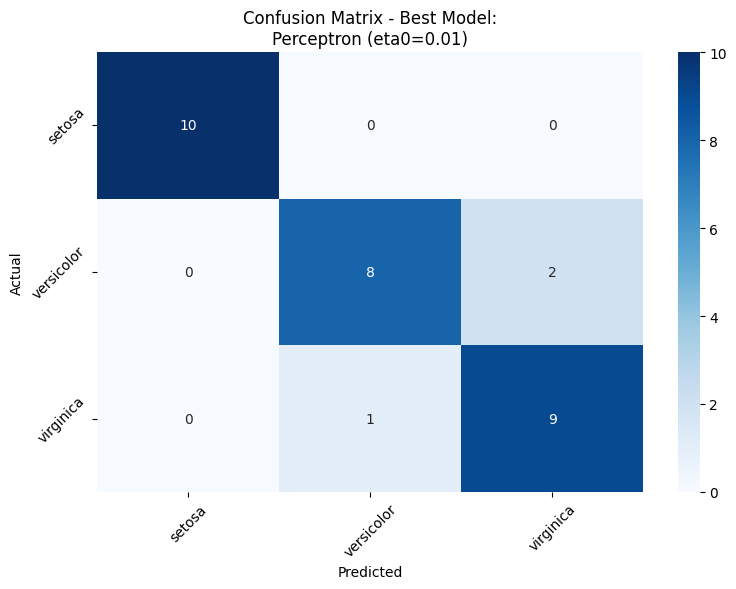

In [8]:
# پیدا کردن بهترین مدل بر اساس Accuracy
best_idx = results_df['Accuracy'].idxmax()
best_model_name = results_df.loc[best_idx, 'Model Name']
best_cm = results_df.loc[best_idx, 'Confusion Matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title(f'Confusion Matrix - Best Model:\n{best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

This code identifies the best-performing model based on the highest accuracy from the results_df DataFrame, then visualizes its confusion matrix as a heatmap using Seaborn. The plot is labeled with actual and predicted class names (from the Iris dataset), includes counts in each cell, and is titled with the best model’s name.

In [9]:
print("\n" + "="*120)
print("📊 تحلیل و مقایسه مدل‌ها")
print("="*120)

# بهترین مدل بر اساس Accuracy
best_acc_model = results_df.loc[results_df['Accuracy'].idxmax(), 'Model Name']
best_acc = results_df['Accuracy'].max()

print(f"✅ بهترین مدل از نظر Accuracy: '{best_acc_model}' با دقت {best_acc:.4f}")

# مقایسه max_iter
max_iter_models = results_df[results_df['Model Name'].str.contains('max_iter')]
print(f"\n📊 میانگین Accuracy با max_iter مختلف: {max_iter_models['Accuracy'].mean():.4f}")

# مقایسه eta0
eta0_models = results_df[results_df['Model Name'].str.contains('eta0')]
print(f"📊 میانگین Accuracy با eta0 مختلف: {eta0_models['Accuracy'].mean():.4f}")

# تأثیر PCA
pca_model = results_df[results_df['Model Name'].str.contains('PCA')]
print(f"\n📌 تأثیر PCA: دقت مدل با PCA {pca_model['Accuracy'].values[0]:.4f} است. این نشان می‌دهد که کاهش بعد می‌تواند عملکرد را کاهش دهد.")

# بررسی همگرایی
print(f"\n🔍 تعداد مدل‌هایی که همگرا شدند: {results_df['Converged?'].sum()} از {len(results_df)} مدل")


📊 تحلیل و مقایسه مدل‌ها
✅ بهترین مدل از نظر Accuracy: 'Perceptron (eta0=0.01)' با دقت 0.9000

📊 میانگین Accuracy با max_iter مختلف: 0.8667
📊 میانگین Accuracy با eta0 مختلف: 0.8250

📌 تأثیر PCA: دقت مدل با PCA 0.8667 است. این نشان می‌دهد که کاهش بعد می‌تواند عملکرد را کاهش دهد.

🔍 تعداد مدل‌هایی که همگرا شدند: 10 از 10 مدل


This code prints a concise comparative analysis of the trained Perceptron models:

Identifies and displays the best model by accuracy.
Computes and reports the average accuracy of models tuned with different max_iter values.
Computes and reports the average accuracy of models tuned with different eta0 (learning rate) values.
Shows the accuracy of the PCA-reduced model and comments that dimensionality reduction may degrade performance.
Counts and reports how many models converged (i.e., finished training before hitting max_iter).

In [10]:
# پیش‌بینی با بهترین مدل
best_model = models[results_df['Accuracy'].idxmax()][1]
if "PCA" in best_model_name:
    y_pred_best = best_model.predict(X_test_pca)
else:
    y_pred_best = best_model.predict(X_test_scaled)

print("\n" + "="*120)
print("📋 گزارش کامل طبقه‌بندی برای بهترین مدل:")
print("="*120)
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))


📋 گزارش کامل طبقه‌بندی برای بهترین مدل:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



This code uses the best-performing model (selected by highest accuracy) to make predictions on the test set—using PCA-transformed data if the best model involves PCA, otherwise using scaled data. It then prints a detailed classification report showing precision, recall, f1-score, and support for each Iris class.

In [11]:
print("\n" + "="*120)
print("📝 نتیجه‌گیری")
print("="*120)
print("""
در این تمرین، مدل Perceptron برای طبقه‌بندی داده‌های Iris (سه کلاسی) آموزش داده شد.

نتایج نشان می‌دهد که:

- **Perceptron** یک الگوریتم ساده و خطی است که برای مسائلی که قابل جدا کردن خطی هستند، عملکرد خوبی دارد.
- **پارامتر max_iter** تعیین می‌کنه که چند دور آموزش انجام بشه. مقادیر بزرگتر ممکن است منجر به همگرایی بهتر شوند.
- **پارامتر eta0** (نرخ یادگیری) نقش مهمی در سرعت همگرایی دارد. مقادیر کوچکتر (مثل 0.01 یا 0.001) ممکن است منجر به همگرایی بهتر شوند.
- **PCA** برای کاهش بعد استفاده شد، اما معمولاً باعث کاهش دقت می‌شود، چون اطلاعاتی از داده‌ها از دست می‌رود.
- **Perceptron** فقط برای مسائلی که قابل جدا کردن خطی هستند، مناسب است. در اینجا چون Iris قابل جدا کردن خطی است، عملکرد خوبی داشته است.

به طور کلی، Perceptron یک الگوریتم ساده و سریع است، اما برای مسائل پیچیده‌تر، الگوریتم‌های پیشرفته‌تری مثل SVM یا Neural Networks مناسب‌تر هستند.
""")


📝 نتیجه‌گیری

در این تمرین، مدل Perceptron برای طبقه‌بندی داده‌های Iris (سه کلاسی) آموزش داده شد.

نتایج نشان می‌دهد که:

- **Perceptron** یک الگوریتم ساده و خطی است که برای مسائلی که قابل جدا کردن خطی هستند، عملکرد خوبی دارد.
- **پارامتر max_iter** تعیین می‌کنه که چند دور آموزش انجام بشه. مقادیر بزرگتر ممکن است منجر به همگرایی بهتر شوند.
- **پارامتر eta0** (نرخ یادگیری) نقش مهمی در سرعت همگرایی دارد. مقادیر کوچکتر (مثل 0.01 یا 0.001) ممکن است منجر به همگرایی بهتر شوند.
- **PCA** برای کاهش بعد استفاده شد، اما معمولاً باعث کاهش دقت می‌شود، چون اطلاعاتی از داده‌ها از دست می‌رود.
- **Perceptron** فقط برای مسائلی که قابل جدا کردن خطی هستند، مناسب است. در اینجا چون Iris قابل جدا کردن خطی است، عملکرد خوبی داشته است.

به طور کلی، Perceptron یک الگوریتم ساده و سریع است، اما برای مسائل پیچیده‌تر، الگوریتم‌های پیشرفته‌تری مثل SVM یا Neural Networks مناسب‌تر هستند.

